In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('Downloads/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [26]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [28]:
# Step 1: Data Cleaning and Preparation
def data_cleaning(df):
    """Function to clean and preprocess the data."""
    # Fill missing values for 'smoking_history' and 'HbA1c_level'
    df['smoking_history'].fillna('No Info', inplace=True)
    df['HbA1c_level'].fillna(df['HbA1c_level'].mean(), inplace=True)

    # Convert categorical variables to numerical
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
    df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3})

    return df

In [29]:
# Step 2: Line Fitting (Linear Regression)
def line_fitting(df):
    """Function to fit a line using linear regression and plot it."""
    # Example: Fit a line to predict 'HbA1c_level' from 'age'
    X = df[['age']]  # Independent variable
    y = df['HbA1c_level']  # Dependent variable

    # Perform linear regression
    regressor = LinearRegression()
    regressor.fit(X, y)
    df['HbA1c_pred'] = regressor.predict(X)

    # Plot the regression line
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='HbA1c_level', data=df, color='blue', label='Actual')
    plt.plot(df['age'], df['HbA1c_pred'], color='red', label='Regression Line')
    plt.title("Linear Regression: Age vs HbA1c_level")
    plt.xlabel("Age")
    plt.ylabel("HbA1c Level")
    plt.legend()
    plt.show()

In [30]:
# Step 3: Correlation Heatmap
def correlation_heatmap(df):
    """Function to plot a correlation heatmap."""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Variables")
    plt.show()

In [31]:
# Step 4: Elbow Plot for K-means
def elbow_plot(df):
    """Function to plot the elbow method for K-means."""
    # Normalize numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)

    # Plot elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o', color='red')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

In [32]:
# Step 5: Confusion Matrix for Diabetes Prediction
def confusion_matrix_plot(df):
    """Function to plot the confusion matrix for diabetes prediction."""
    # Prepare the data for classification (predict diabetes)
    X = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
    y = df['diabetes']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit a logistic regression model
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict and compute confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.title("Confusion Matrix for Diabetes Prediction")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

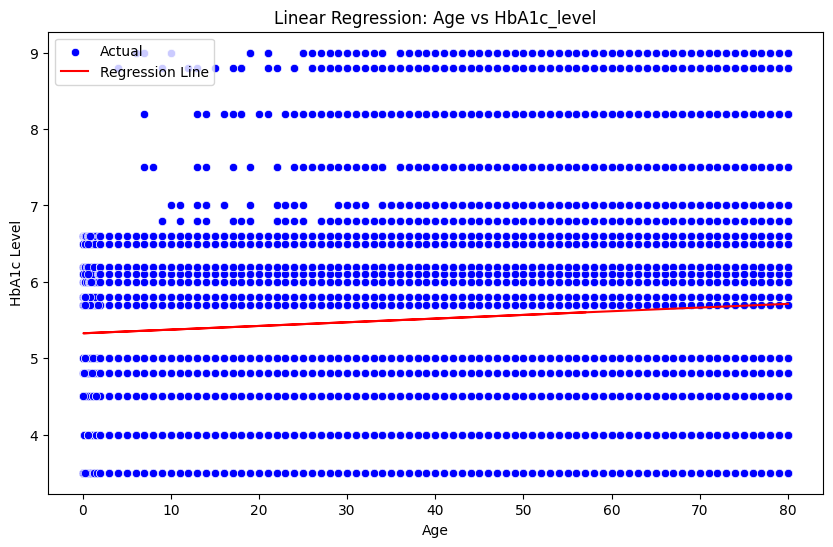

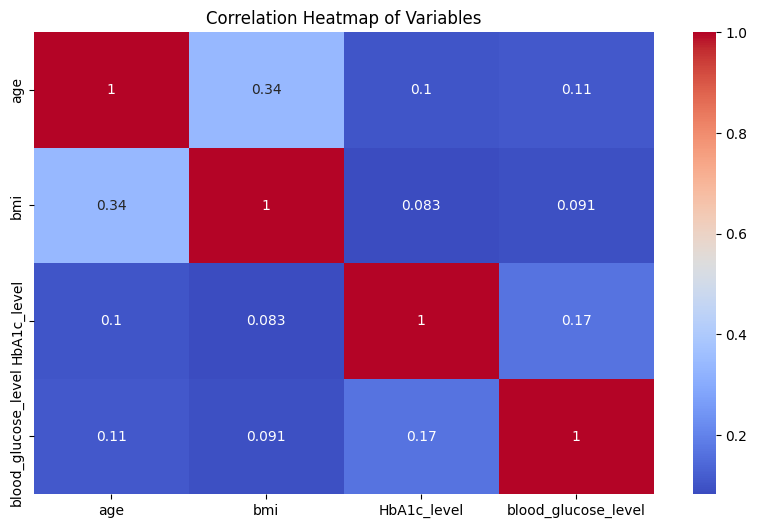

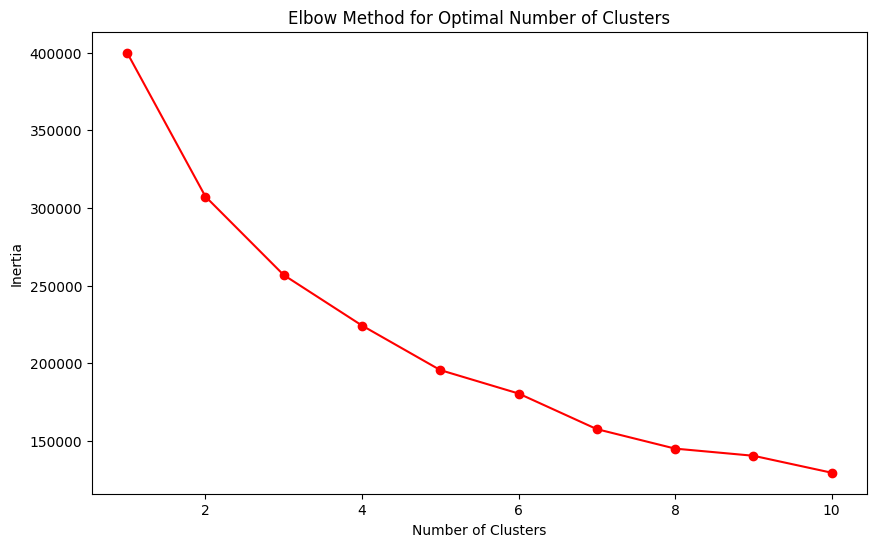

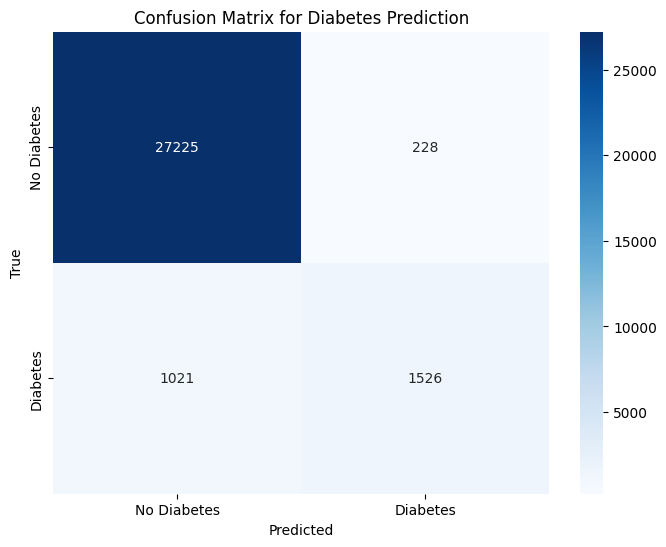

In [33]:
# Step 6: Generate All Plots
def generate_plots(df):
    """Function to generate all required plots."""
    # Data Cleaning
    df_cleaned = data_cleaning(df)

    # Generate all required plots
    line_fitting(df_cleaned)  # Linear regression plot
    correlation_heatmap(df_cleaned)  # Correlation heatmap
    elbow_plot(df_cleaned)  # Elbow plot
    confusion_matrix_plot(df_cleaned)  # Confusion matrix

# Run the function to generate all plots
generate_plots(df)